In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
print(os.getcwd())

c:\house-rent-prediction-model\research


In [63]:
df = pd.read_csv('../artifacts/data_ingestion/dataset.csv')

In [64]:
df.shape

(10692, 13)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   City                    10692 non-null  object
 1   area                    10692 non-null  int64 
 2   rooms                   10692 non-null  int64 
 3   bathrooms               10692 non-null  int64 
 4   parking Space           10692 non-null  int64 
 5   floor                   10692 non-null  int64 
 6   pets                    10692 non-null  object
 7   furnished               10692 non-null  object
 8   Homeowners Association  10692 non-null  int64 
 9   rent_amount             10692 non-null  int64 
 10  property_tax            10692 non-null  int64 
 11  fire_insurance          10692 non-null  int64 
 12  total_amount            10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [66]:
df.isnull().sum()  # No null values.....

City                      0
area                      0
rooms                     0
bathrooms                 0
parking Space             0
floor                     0
pets                      0
furnished                 0
Homeowners Association    0
rent_amount               0
property_tax              0
fire_insurance            0
total_amount              0
dtype: int64

In [67]:
df.describe()

,area,rooms,bathrooms,parking Space,floor,Homeowners Association,rent_amount,property_tax,fire_insurance,total_amount
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [68]:
df.duplicated().sum()

358

Univariate Analysis

<Axes: xlabel='City', ylabel='count'>

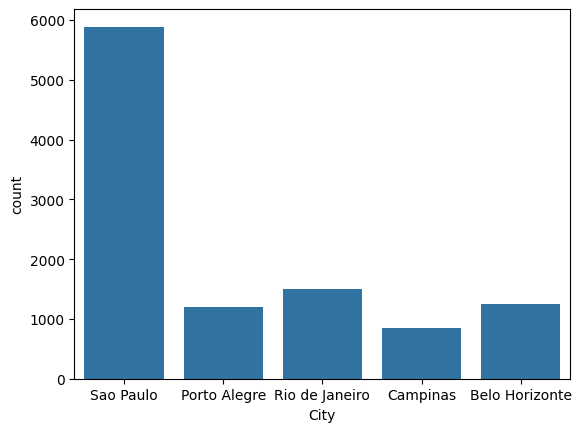

In [69]:
sns.countplot(data=df,x='City')

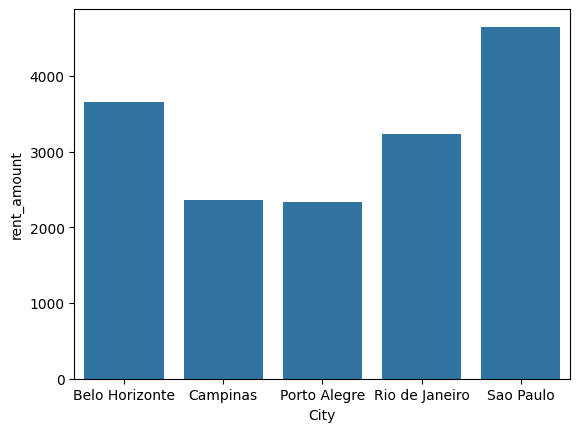

In [70]:
sns.barplot(df.groupby('City')['rent_amount'].mean())
plt.show()

In [71]:
df.sample(2)

,City,area,rooms,bathrooms,parking Space,floor,pets,furnished,Homeowners Association,rent_amount,property_tax,fire_insurance,total_amount
2720,Sao Paulo,120,3,3,2,23,not acept,not furnished,1500,7300,400,93,9293
5849,Belo Horizonte,110,2,2,1,6,acept,not furnished,700,4000,84,54,4838


<Axes: ylabel='area'>

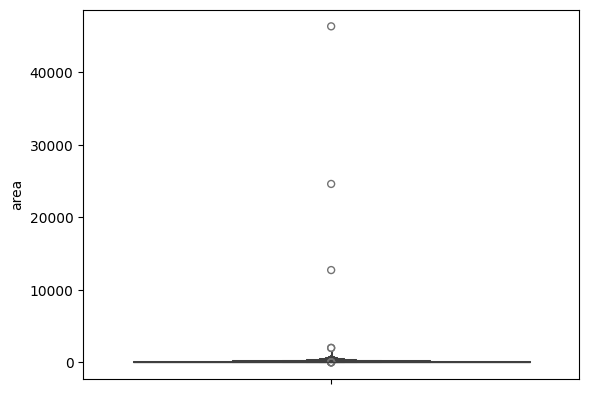

In [72]:
sns.boxenplot(data=df,y='area')

In [73]:
outliers = []

q1 = np.percentile(df['area'],25)
q3 = np.percentile(df['area'],75)
iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
4
print(f'lower_bound: {lower_bound}\nupper_bound: {upper_bound}')
for x in df['area']:
    if x<lower_bound or x>upper_bound:
        outliers.append(x)

print(len(outliers))

lower_bound: -133.0
upper_bound: 371.0
672


In [74]:
df[(df['area'] < lower_bound) | (df['area'] > upper_bound)]

,City,area,rooms,bathrooms,parking Space,floor,pets,furnished,Homeowners Association,rent_amount,property_tax,fire_insurance,total_amount
5,Sao Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
19,Sao Paulo,600,4,5,6,0,acept,not furnished,0,12000,9500,181,21680
86,Sao Paulo,600,4,4,4,9,acept,not furnished,7400,8500,3368,108,19380
105,Belo Horizonte,400,4,2,2,0,not acept,not furnished,0,2500,74,41,2615
131,Sao Paulo,900,4,6,8,0,acept,not furnished,0,15000,4417,226,19640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,Belo Horizonte,500,8,5,8,0,acept,not furnished,0,5000,150,82,5232
10611,Campinas,411,4,5,4,0,acept,not furnished,0,5500,667,83,6250
10620,Rio de Janeiro,400,4,4,2,0,acept,not furnished,2000,15000,917,229,18150
10630,Sao Paulo,380,3,5,4,0,acept,not furnished,0,5500,1200,83,6783


In [75]:
df_cleaned = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]


In [76]:
df_cleaned.shape

(10020, 13)

<Axes: xlabel='area', ylabel='Density'>

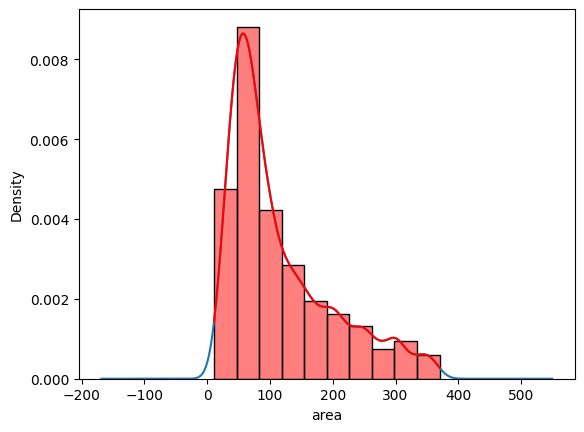

In [77]:
df_cleaned['area'].plot(kind='kde')
sns.histplot(data=df_cleaned,x='area',bins=10,kde=True,stat='density',color='red')

<Axes: xlabel='area', ylabel='rent_amount'>

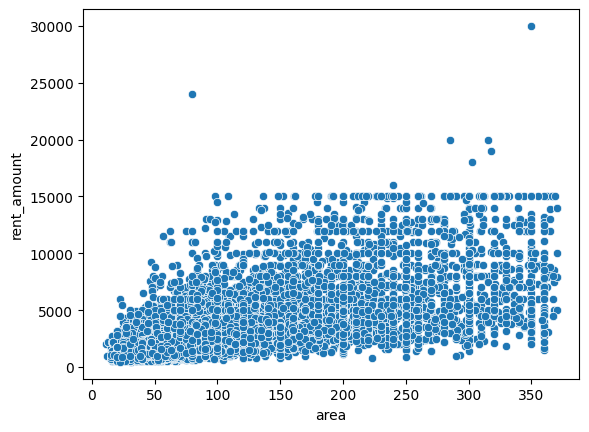

In [78]:
sns.scatterplot(data=df_cleaned,x='area',y='rent_amount')

<Axes: xlabel='area', ylabel='rooms'>

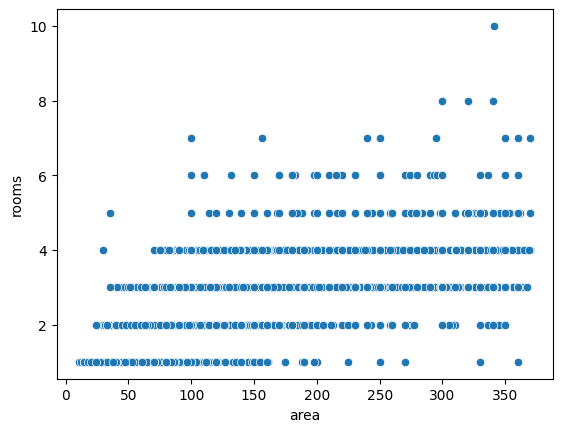

In [79]:
sns.scatterplot(data=df_cleaned,x='area',y='rooms')

<Axes: xlabel='area', ylabel='bathrooms'>

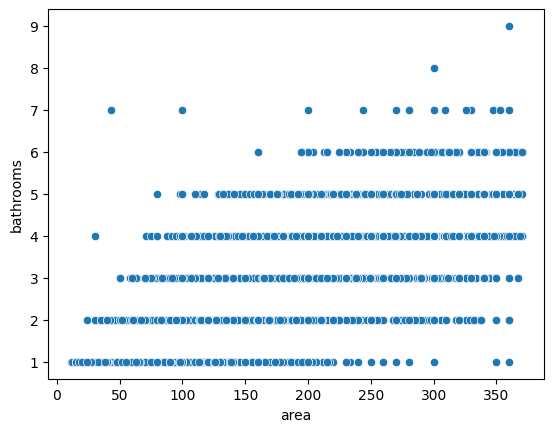

In [80]:
sns.scatterplot(data=df_cleaned,x='area',y='bathrooms')

<Axes: xlabel='area', ylabel='parking Space'>

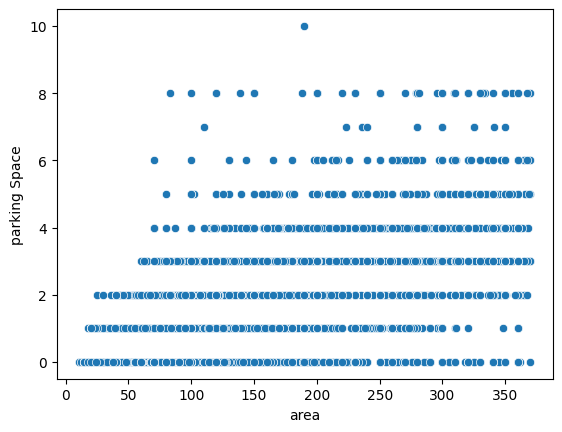

In [81]:
sns.scatterplot(data=df_cleaned,x='area',y='parking Space')

In [82]:
df_cleaned.describe()

,area,rooms,bathrooms,parking Space,floor,Homeowners Association,rent_amount,property_tax,fire_insurance,total_amount
count,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,1.002000e+04,10020.000000,10020.000000,10020.000000,1.002000e+04
mean,116.064770,2.387525,2.064571,1.430140,5.220359,1.150773e+03,3514.389920,299.498403,47.453293,5.012321e+03
std,82.894232,1.073236,1.223062,1.378332,6.087752,1.609440e+04,2988.684356,3175.356056,40.532033,1.685653e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,55.000000,2.000000,1.000000,0.000000,1.000000,2.300000e+02,1500.000000,34.000000,20.000000,1.997000e+03
50%,85.000000,2.000000,2.000000,1.000000,4.000000,5.710000e+02,2500.000000,112.000000,33.000000,3.349000e+03
75%,160.000000,3.000000,3.000000,2.000000,8.000000,1.200000e+03,4446.250000,317.000000,59.000000,6.017250e+03
max,370.000000,10.000000,9.000000,10.000000,301.000000,1.117000e+06,30000.000000,313700.000000,451.000000,1.120000e+06


In [83]:
outliers = []

q1 = np.percentile(df_cleaned['floor'],25)
q3 = np.percentile(df_cleaned['floor'],75)
iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

print(f'lower_bound: {lower_bound}\nupper_bound: {upper_bound}')
for x in df_cleaned['floor']:
    if x<lower_bound or x>upper_bound:
        outliers.append(x)

print(len(outliers))

lower_bound: -9.5
upper_bound: 18.5
258


In [84]:
df_cleaned = df_cleaned[(df_cleaned['floor'] >= lower_bound) & (df_cleaned['floor'] <= upper_bound)]


In [85]:
df_cleaned.shape

(9762, 13)

<Axes: xlabel='floor', ylabel='Density'>

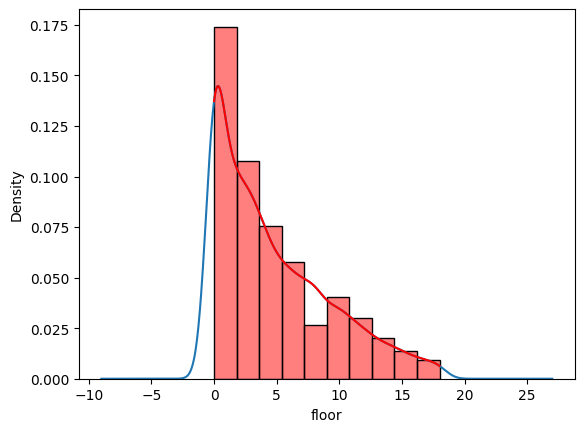

In [86]:
df_cleaned['floor'].plot(kind='kde')
sns.histplot(data=df_cleaned,x='floor',bins=10,kde=True,stat='density',color='red')

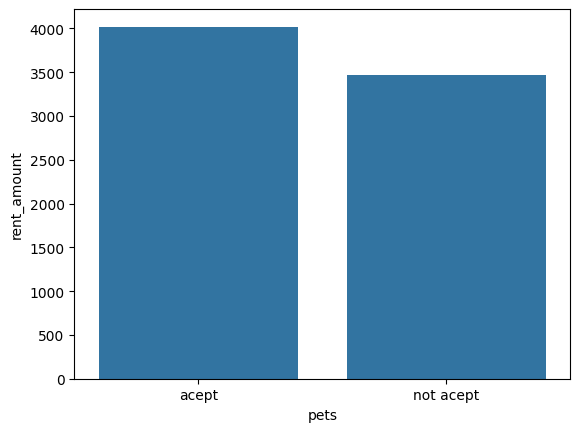

In [39]:
sns.barplot(df.groupby('pets')['rent_amount'].mean())
plt.show()

<Axes: xlabel='furnished', ylabel='count'>

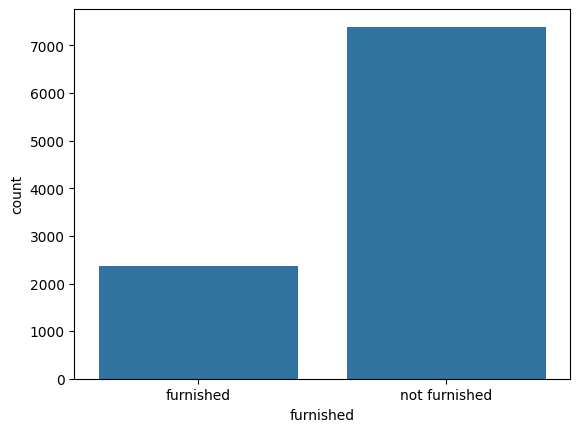

In [87]:
sns.countplot(data=df_cleaned,x='furnished')

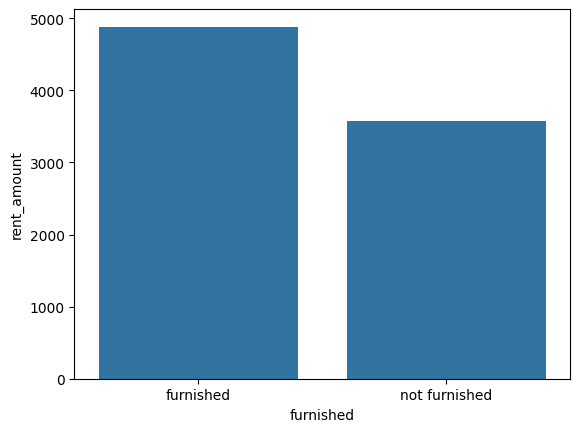

In [41]:
sns.barplot(df.groupby('furnished')['rent_amount'].mean())
plt.show()

In [53]:
df.sample(5)

,City,area,rooms,bathrooms,parking Space,floor,pets,furnished,Homeowners Association,rent_amount,property_tax,fire_insurance,total_amount
3585,Sao Paulo,90,3,2,2,0,acept,furnished,200,4100,300,62,4662
10590,Belo Horizonte,350,5,2,7,0,acept,furnished,0,9000,602,148,9750
2177,Sao Paulo,260,4,5,5,6,acept,not furnished,3000,12500,1667,159,17330
7709,Rio de Janeiro,76,3,2,1,4,acept,not furnished,571,1800,65,24,2460
4373,Sao Paulo,53,2,1,1,1,acept,not furnished,550,1250,0,16,1816


<Axes: xlabel='rooms', ylabel='rent_amount'>

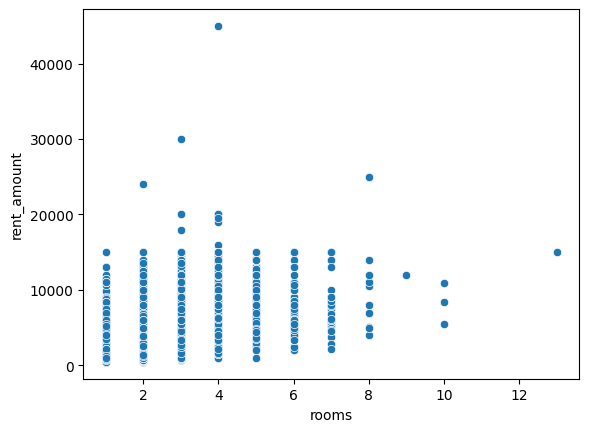

In [60]:
sns.scatterplot(data=df,x='rooms',y='rent_amount')

In [59]:
df.select_dtypes(include='number').corr()['rent_amount']

area                      0.180742
rooms                     0.541758
bathrooms                 0.668504
parking Space             0.578361
floor                     0.073596
Homeowners Association    0.036490
rent_amount               1.000000
property_tax              0.107884
fire_insurance            0.987343
total_amount              0.264490
Name: rent_amount, dtype: float64